In [157]:
#Preprocessing for the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns    

"""
This section handles data preprocessing tasks such as:
- Handling missing values
- Removing duplicates
- Encoding categorical variables
- Scaling numerical features
"""
""" Then we will make a first model to then evlautae it and develop it"""

import warnings
# Filtre les avertissements de type UserWarning et RuntimeWarning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)



In [77]:
data=prdata=pd.read_excel('archive/dataset.xlsx')
df=data.copy()
df.head()


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
missing_rate=df.isna().sum()/df.shape[0]
blood_columns=list(df.columns[(missing_rate<0.9)&(missing_rate>0.88)])
viral_columns=list(df.columns[(missing_rate<0.80)&(missing_rate>0.75)])

key_columns=["Patient age quantile","SARS-Cov-2 exam result"]
columns_to_keep=key_columns+blood_columns+viral_columns
df=df[columns_to_keep]
df.head()


,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


In [79]:
#YTrain test split
from sklearn.model_selection import train_test_split
trainset,testset=train_test_split(df,test_size=0.2,random_state=458)



In [80]:
testset["SARS-Cov-2 exam result"].value_counts()

SARS-Cov-2 exam result
negative    1003
positive     126
Name: count, dtype: int64

In [81]:
trainset["SARS-Cov-2 exam result"].value_counts()

SARS-Cov-2 exam result
negative    4083
positive     432
Name: count, dtype: int64

In [12]:
#Partie de l'encodage


In [82]:
def encodage(df):
    code={"positive":1,"negative":0,"detected":1,"not_detected":0}
    for col in df.columns:
        if df[col].dtype=="object":
            df[col]=df[col].map(code)
    return df

In [83]:
df.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


In [94]:
def feature_engineering(df):
    df["est_malade"]=df[viral_columns].sum(axis=1)>=1
    df=df.drop(viral_columns,axis=1)
    return df

In [95]:
def imputation(df):
    #df["isna"]=(df["Parainfluenza 3"].isna())|(df["Leukocytes"].isna())
    #df=df.fillna(-999)
    df=df.dropna(axis=0)
    return df


In [96]:

def preprocessing(df):
    df=encodage(df)
    df=feature_engineering(df)
    df=imputation(df)
    X=df.drop("SARS-Cov-2 exam result",axis=1)
    y=df["SARS-Cov-2 exam result"]
    print(y.value_counts())
    return X,y

In [97]:
X_train,y_train=preprocessing(trainset)


SARS-Cov-2 exam result
0    430
1     64
Name: count, dtype: int64


In [98]:
X_test,y_test=preprocessing(testset)

SARS-Cov-2 exam result
0    87
1    17
Name: count, dtype: int64


In [136]:

#Premiere modelisation
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.decomposition import PCA


In [140]:
preprocessor=make_pipeline(PolynomialFeatures(2,include_bias=False),SelectKBest(f_classif,k=10))


In [137]:
RandomForest=make_pipeline(preprocessor,RandomForestClassifier(random_state=458))
AdaBoost=make_pipeline(preprocessor,AdaBoostClassifier(random_state=458))
SVM=make_pipeline(preprocessor,StandardScaler(),SVC(random_state=458))
Knn=make_pipeline(preprocessor,StandardScaler(),KNeighborsClassifier())

In [142]:
list_of_models={"RandomForest":RandomForest,"AdaBoost":AdaBoost,"SVM":SVM,"Knn":Knn}

In [144]:

from sklearn.metrics import f1_score,classification_report,confusion_matrix
from sklearn.model_selection import learning_curve


In [145]:
def evaluate(model):
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    print(classification_report(y_test,ypred))
    print(confusion_matrix(y_test,ypred))
    N,train_score,val_score=learning_curve(model,X_train,y_train,cv=5,scoring="f1",train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(10,6))
    plt.plot(N,train_score.mean(axis=1),label="Train score")
    plt.plot(N,val_score.mean(axis=1),label="Validation score")
    plt.xlabel("Training size")
    plt.ylabel("F1 score")
    plt.legend()
    plt.title("Learning curve")
    plt.show()
    

RandomForest
              precision    recall  f1-score   support

           0       0.88      0.95      0.92        87
           1       0.60      0.35      0.44        17

    accuracy                           0.86       104
   macro avg       0.74      0.65      0.68       104
weighted avg       0.84      0.86      0.84       104

[[83  4]
 [11  6]]


C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are const

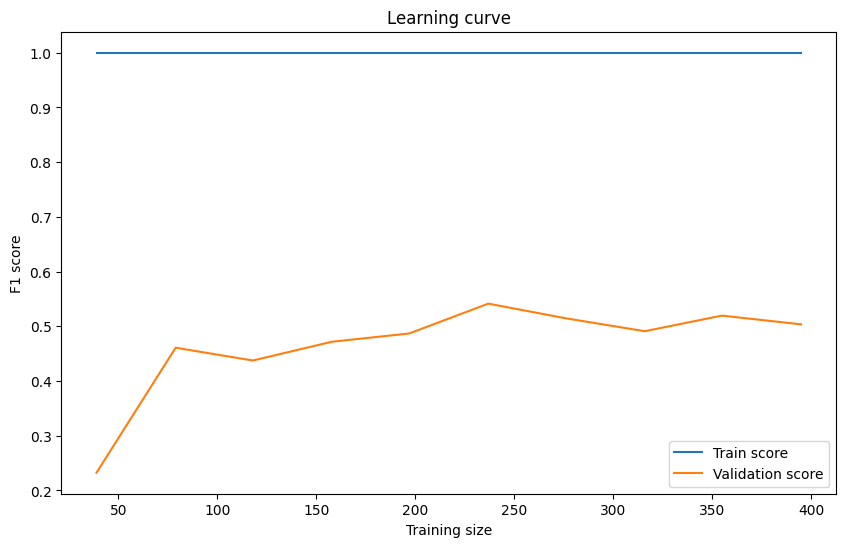

AdaBoost
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        87
           1       0.56      0.29      0.38        17

    accuracy                           0.85       104
   macro avg       0.71      0.62      0.65       104
weighted avg       0.82      0.85      0.83       104

[[83  4]
 [12  5]]


C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are const

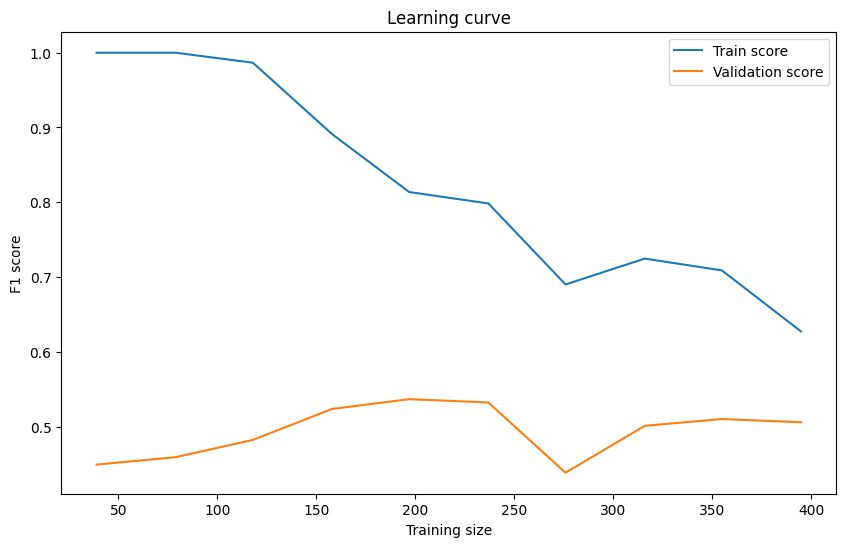

C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are const

SVM
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        87
           1       0.64      0.41      0.50        17

    accuracy                           0.87       104
   macro avg       0.76      0.68      0.71       104
weighted avg       0.85      0.87      0.85       104

[[83  4]
 [10  7]]


C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are const

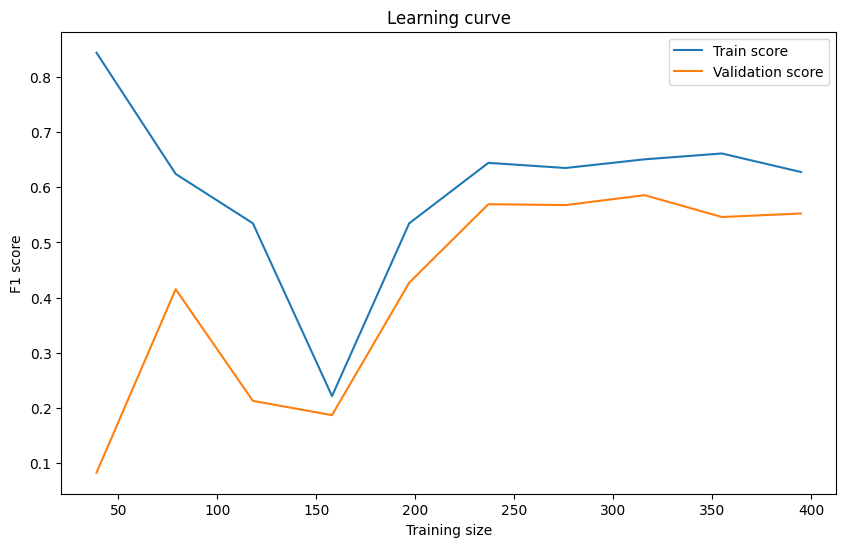

C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are const

Knn
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        87
           1       0.69      0.53      0.60        17

    accuracy                           0.88       104
   macro avg       0.80      0.74      0.77       104
weighted avg       0.88      0.88      0.88       104

[[83  4]
 [ 8  9]]


C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are const

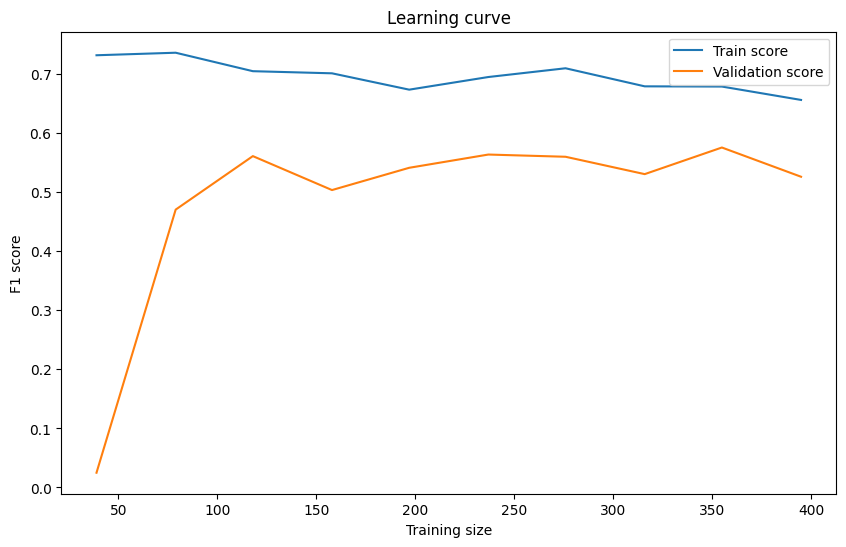

In [146]:
for name,model in list_of_models.items():
    print(name)
    evaluate(model)

In [159]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
SVM

,steps,"[('pipeline', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('polynomialfeatures', ...), ('selectkbest', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,True


In [168]:
hyper_params={"svc__gamma":[1e-3,1e-4],"svc__C":[1,10,100,1000]
            ,'pipeline__polynomialfeatures__degree':[2,3,4],
            'pipeline__selectkbest__k':range(20,60)}

            


In [169]:
grid=RandomizedSearchCV(SVM,hyper_params,cv=4,scoring="recall",n_iter=40)
grid.fit(X_train,y_train)
print("Best parameters:",grid.best_params_)
print(grid.best_estimator_)
y_pred=grid.best_estimator_.predict(X_test)
print(classification_report(y_test,y_pred))

Best parameters: {'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 20, 'pipeline__polynomialfeatures__degree': 3}
Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=3)),
                                 ('selectkbest', SelectKBest(k=20))])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(C=1000, gamma=0.001, random_state=458))])
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        87
           1       0.73      0.47      0.57        17

    accuracy                           0.88       104
   macro avg       0.82      0.72      0.75       104
weighted avg       0.87      0.88      0.87       104



              precision    recall  f1-score   support

           0       0.90      0.97      0.93        87
           1       0.73      0.47      0.57        17

    accuracy                           0.88       104
   macro avg       0.82      0.72      0.75       104
weighted avg       0.87      0.88      0.87       104

[[84  3]
 [ 9  8]]


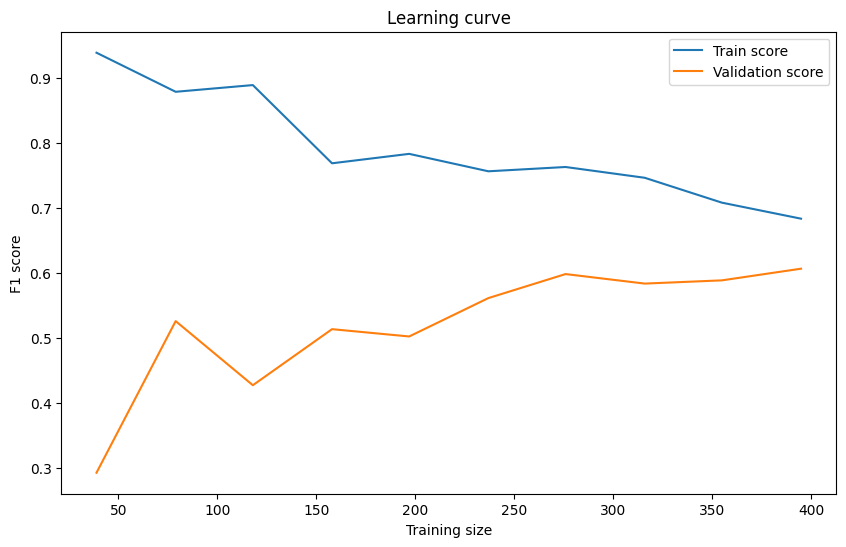

In [171]:
evaluate(grid.best_estimator_)

Text(0.5, 1.0, 'Precision-Recall curve')

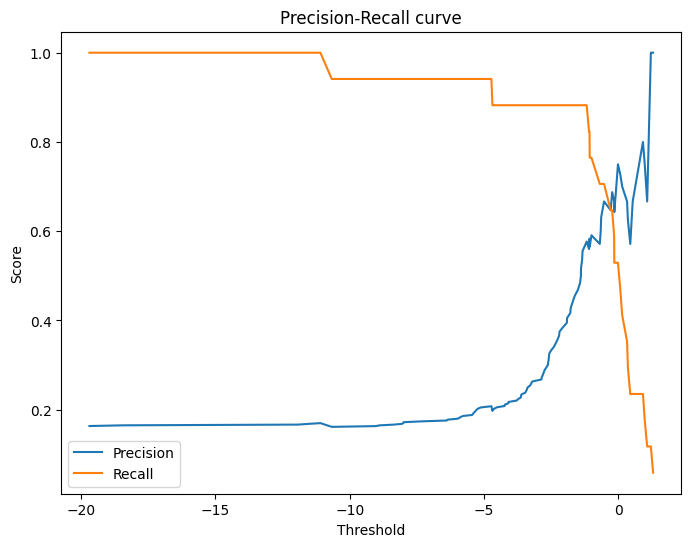

In [176]:
from sklearn.metrics import precision_recall_curve
precision,recall,threshold=precision_recall_curve(y_test,grid.best_estimator_.decision_function(X_test))
plt.figure(figsize=(8,6))
plt.plot(threshold,precision[:-1],label="Precision")
plt.plot(threshold,recall[:-1],label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall curve")

In [180]:
def model_final(model,X,threshold=0):
    return (model.decision_function(X)>threshold)

In [192]:
y_pred=model_final(grid.best_estimator_,X_test,threshold=-1.25)

In [193]:
f1_score(y_test,y_pred)

0.6976744186046512

In [194]:
from sklearn.metrics import recall_score,precision_score
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8823529411764706
0.5769230769230769
